# Producto 2

# Instalamos Librerias Necesarias

In [ ]:
! pip install geopandas networkx osmnx shapely
!git clone https://github.com/reubenjohn/STGCN-traffic-forecasting.git
%cd STGCN-traffic-forecasting
!pip install -r /content/stgcn/requirements.txt



Cloning into 'STGCN-traffic-forecasting'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 59 (delta 7), reused 4 (delta 4), pack-reused 40 (from 2)
Receiving objects: 100% (59/59), 7.06 MiB | 41.79 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/STGCN-traffic-forecasting/STGCN-traffic-forecasting/STGCN-traffic-forecasting
ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/content/stgcn/requirements.txt'


### 1. Carga de datos de tráfico (Enero 2025)

En esta sección se importa la base de datos que contiene los conteos horarios de vehículos para el mes de enero de 2025.  
Se utiliza la biblioteca `pandas` para leer el archivo en formato Excel.  
Luego, se eliminan las filas que contienen valores nulos para garantizar que los datos estén limpios antes del análisis.


In [ ]:
import pandas as pd

# Cargar archivo
df = pd.read_excel("/content/sample_data/CONTEO POR HORAS ENERO 2025.xlsx", engine='openpyxl')

# Eliminar filas con valores NaN
df = df.dropna()

# Mostrar el DataFrame resultante
df

,ALIAS,CRUCE,SENTIDO,00,01,02,03,04,05,06,...,14,15,16,17,18,19,20,21,22,23
0,01-01-2025PM001-0-01,Av. 10 de Agosto y Av. de America,NORTE-SUR,194.0,363.0,315.0,161.0,96.0,72.0,193.0,...,511.0,489.0,511.0,473.0,440.0,420.0,287.0,223.0,150.0,106.0
1,01-01-2025PM001-0-04,Av. 10 de Agosto y Av. de America,OCCIDENTE-ORIENTE,121.0,259.0,219.0,101.0,56.0,57.0,123.0,...,220.0,232.0,1.0,302.0,288.0,273.0,225.0,139.0,114.0,57.0
2,01-01-2025PM001-0-07,Av. 10 de Agosto y Av. de America,SUR-NORTE,113.0,196.0,177.0,110.0,74.0,64.0,124.0,...,289.0,251.0,288.0,304.0,306.0,265.0,200.0,131.0,123.0,80.0
3,01-01-2025PM001-0-08,Av. 10 de Agosto y Av. de America,GIRO DERECHA SUR-NORTE,99.0,196.0,171.0,95.0,54.0,42.0,67.0,...,311.0,360.0,372.0,345.0,304.0,305.0,230.0,140.0,96.0,57.0
4,01-01-2025PM003-0-011,Av. 10 de Agosto y Falconi,NORTE-SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61158,31-01-2025PM923-0-07,Terminal Guamani Sur,SUR-NORTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61159,31-01-2025PM924-0-01,Av.Maldonado - S59,NORTE-SUR,180.0,108.0,123.0,141.0,281.0,693.0,1132.0,...,911.0,991.0,814.0,0.0,990.0,969.0,950.0,812.0,636.0,459.0
61160,31-01-2025PM924-0-04,Av.Maldonado - S59,OCCIDENTE-ORIENTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61161,31-01-2025PM924-0-07,Av.Maldonado - S59,SUR-NORTE,196.0,126.0,108.0,117.0,267.0,616.0,823.0,...,522.0,536.0,1438.0,65.0,1220.0,1183.0,867.0,699.0,568.0,377.0


### 2. Carga de coordenadas de los sensores de tráfico

En esta sección se importa la base de datos que contiene las coordenadas geográficas de los sensores de tráfico instalados en las intersecciones del eje vial de Quito.  
El archivo es leído utilizando `pandas` desde un archivo Excel.  
Posteriormente, se eliminan las filas con valores nulos para asegurar que todas las ubicaciones estén correctamente definidas.


In [ ]:
import pandas as pd
import ast
# Cargar archivo
Coordenadas = pd.read_excel("/content/sample_data/coordenadas_separadas.xlsx", engine='openpyxl')

# Eliminar filas con valores NaN
Coordenadas = Coordenadas.dropna()


# Mostrar el DataFrame resultante
Coordenadas

,INTERSECCIONES,COORDENADAS,Latitud,Longitud
0,Av. 10 de Agosto y Av. de America,"[-0.16834505143711098, -78.48724659076376]",-0.168345,-78.487247
1,Av. 10 de Agosto y Falconi,"[-0.1627642, -78.4870602]",-0.162764,-78.487060
2,Av. 10 de Agosto y El Inca,"[-0.1601511, -78.4855719]",-0.160151,-78.485572
3,Av. 10 de Agosto y Juan de Ascaray,"[-0.16646018760533535, -78.4864976252858]",-0.166460,-78.486498
4,Av. 6 de Diciembre y Tomas de Berlanga PP1,"[-0.166238, -78.4779816]",-0.166238,-78.477982
...,...,...,...,...
454,Av. Maldonado - Calle S55A (Scania),"[-0.2739787, -78.4694999]",-0.273979,-78.469500
455,Terminal Guamani Centro,"[-0.2739787, -78.4694999]",-0.273979,-78.469500
456,Terminal Guamani Oriente,"[-0.2739787, -78.4694999]",-0.273979,-78.469500
457,Terminal Guamani Sur,"[-0.2739787, -78.4694999]",-0.273979,-78.469500


### 3. Revisión y depuración de registros duplicados por intersección y cruce

En esta sección se identifican y eliminan posibles registros duplicados que pueden existir para una misma intersección y cruce por día y hora.

Para ello:
- Se crea una nueva columna llamada `ALIAS_BASE` a partir de la columna `ALIAS`, eliminando letras finales si las hay.
- Se identifican los valores duplicados en `ALIAS_BASE`, lo que permite detectar conflictos en los datos.
- Finalmente, se eliminan los duplicados manteniendo únicamente el primer registro por cada valor único de `ALIAS_BASE`.

Este proceso garantiza que cada sensor tenga un solo registro por intersección y franja horaria diaria.


In [ ]:
# Suponiendo que tienes la columna 'ALIAS'
# Vamos a extraer la parte común del ALIAS sin la letra final (si existe)

# Elimina la letra final si existe y guarda una nueva columna
# Quita una letra al final si existe (por ejemplo, la C en 01-01-2025PM003-0-012C)
df['ALIAS_BASE'] = df['ALIAS'].str.replace(r'[A-Z]$', '', regex=True)


# Contar cuántas veces aparece cada ALIAS_BASE
conteo = df['ALIAS_BASE'].value_counts()

# Filtrar los que tienen más de 1 ocurrencia
duplicados = conteo[conteo > 1]

# Mostrar las fechas/alias base problemáticas
fechas_con_conflicto = df[df['ALIAS_BASE'].isin(duplicados.index)]

In [ ]:
df = df.sort_values(by='ALIAS')  # o por otra columna si tienes fecha
df = df.drop_duplicates(subset='ALIAS_BASE', keep='first')
df

,ALIAS,CRUCE,SENTIDO,00,01,02,03,04,05,06,...,15,16,17,18,19,20,21,22,23,ALIAS_BASE
0,01-01-2025PM001-0-01,Av. 10 de Agosto y Av. de America,NORTE-SUR,194.0,363.0,315.0,161.0,96.0,72.0,193.0,...,489.0,511.0,473.0,440.0,420.0,287.0,223.0,150.0,106.0,01-01-2025PM001-0-01
1,01-01-2025PM001-0-04,Av. 10 de Agosto y Av. de America,OCCIDENTE-ORIENTE,121.0,259.0,219.0,101.0,56.0,57.0,123.0,...,232.0,1.0,302.0,288.0,273.0,225.0,139.0,114.0,57.0,01-01-2025PM001-0-04
2,01-01-2025PM001-0-07,Av. 10 de Agosto y Av. de America,SUR-NORTE,113.0,196.0,177.0,110.0,74.0,64.0,124.0,...,251.0,288.0,304.0,306.0,265.0,200.0,131.0,123.0,80.0,01-01-2025PM001-0-07
3,01-01-2025PM001-0-08,Av. 10 de Agosto y Av. de America,GIRO DERECHA SUR-NORTE,99.0,196.0,171.0,95.0,54.0,42.0,67.0,...,360.0,372.0,345.0,304.0,305.0,230.0,140.0,96.0,57.0,01-01-2025PM001-0-08
4,01-01-2025PM003-0-011,Av. 10 de Agosto y Falconi,NORTE-SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01-01-2025PM003-0-011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61158,31-01-2025PM923-0-07,Terminal Guamani Sur,SUR-NORTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31-01-2025PM923-0-07
61159,31-01-2025PM924-0-01,Av.Maldonado - S59,NORTE-SUR,180.0,108.0,123.0,141.0,281.0,693.0,1132.0,...,991.0,814.0,0.0,990.0,969.0,950.0,812.0,636.0,459.0,31-01-2025PM924-0-01
61160,31-01-2025PM924-0-04,Av.Maldonado - S59,OCCIDENTE-ORIENTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31-01-2025PM924-0-04
61161,31-01-2025PM924-0-07,Av.Maldonado - S59,SUR-NORTE,196.0,126.0,108.0,117.0,267.0,616.0,823.0,...,536.0,1438.0,65.0,1220.0,1183.0,867.0,699.0,568.0,377.0,31-01-2025PM924-0-07


In [ ]:

# Eliminar columnas extras si existen (como 'ALIAS' u otras no deseadas)
columnas_hora = [col for col in df.columns if col not in ['CRUCE', 'SENTIDO'] and col.isdigit()]
df = df[["ALIAS",'CRUCE', 'SENTIDO'] + columnas_hora]

# Derretir (melt) a formato largo
df_long = df.melt(
    id_vars=["ALIAS","CRUCE", "SENTIDO"],
    var_name="HORA",
    value_name="CONTEO"
)

# Convertir hora a entero
df_long["HORA"] = df_long["HORA"].astype(int)
# Eliminar filas sin datos relevantes
df_long = df_long.dropna(subset=["ALIAS","CRUCE", "SENTIDO", "CONTEO"])

df_long

,ALIAS,CRUCE,SENTIDO,HORA,CONTEO
0,01-01-2025PM001-0-01,Av. 10 de Agosto y Av. de America,NORTE-SUR,0,194.0
1,01-01-2025PM001-0-04,Av. 10 de Agosto y Av. de America,OCCIDENTE-ORIENTE,0,121.0
2,01-01-2025PM001-0-07,Av. 10 de Agosto y Av. de America,SUR-NORTE,0,113.0
3,01-01-2025PM001-0-08,Av. 10 de Agosto y Av. de America,GIRO DERECHA SUR-NORTE,0,99.0
4,01-01-2025PM003-0-011,Av. 10 de Agosto y Falconi,NORTE-SUR,0,0.0
...,...,...,...,...,...
1223875,31-01-2025PM923-0-07,Terminal Guamani Sur,SUR-NORTE,23,0.0
1223876,31-01-2025PM924-0-01,Av.Maldonado - S59,NORTE-SUR,23,459.0
1223877,31-01-2025PM924-0-04,Av.Maldonado - S59,OCCIDENTE-ORIENTE,23,0.0
1223878,31-01-2025PM924-0-07,Av.Maldonado - S59,SUR-NORTE,23,377.0


### 4. Integración de coordenadas geográficas con la base de tráfico

En esta etapa se combinan las bases de datos de tráfico y de ubicación de sensores para asignar coordenadas geográficas (latitud y longitud) a cada registro de tráfico.

Pasos realizados:
- Se renombra la columna `INTERSECCIONES` del archivo de coordenadas a `CRUCE`, para que coincida con el nombre presente en la base de tráfico.
- Se realiza un `merge` entre ambas bases utilizando la columna `CRUCE` como clave de unión.
- Se incorporan las columnas `Latitud` y `Longitud` a la base de datos de tráfico.

El resultado es una base unificada donde cada registro de conteo de vehículos está asociado a su ubicación espacial correspondiente.


In [ ]:
import pandas as pd
from ast import literal_eval


# 4. Renombrar columnas para hacer merge
Coordenadas = Coordenadas.rename(columns={"INTERSECCIONES": "CRUCE"})

# 5. Hacer el merge: df tiene columna "CRUCE", Coordenadas también
df_long = pd.merge(df_long, Coordenadas[["CRUCE", "Latitud", "Longitud"]], on="CRUCE", how="left")

# 6. Revisar resultado
df_long

,ALIAS,CRUCE,SENTIDO,HORA,CONTEO,Latitud,Longitud
0,01-01-2025PM001-0-01,Av. 10 de Agosto y Av. de America,NORTE-SUR,0,194.0,-0.168345,-78.487247
1,01-01-2025PM001-0-04,Av. 10 de Agosto y Av. de America,OCCIDENTE-ORIENTE,0,121.0,-0.168345,-78.487247
2,01-01-2025PM001-0-07,Av. 10 de Agosto y Av. de America,SUR-NORTE,0,113.0,-0.168345,-78.487247
3,01-01-2025PM001-0-08,Av. 10 de Agosto y Av. de America,GIRO DERECHA SUR-NORTE,0,99.0,-0.168345,-78.487247
4,01-01-2025PM003-0-011,Av. 10 de Agosto y Falconi,NORTE-SUR,0,0.0,-0.162764,-78.487060
...,...,...,...,...,...,...,...
1223875,31-01-2025PM923-0-07,Terminal Guamani Sur,SUR-NORTE,23,0.0,-0.273979,-78.469500
1223876,31-01-2025PM924-0-01,Av.Maldonado - S59,NORTE-SUR,23,459.0,-0.342044,-78.548985
1223877,31-01-2025PM924-0-04,Av.Maldonado - S59,OCCIDENTE-ORIENTE,23,0.0,-0.342044,-78.548985
1223878,31-01-2025PM924-0-07,Av.Maldonado - S59,SUR-NORTE,23,377.0,-0.342044,-78.548985


### 5. Generación de identificadores únicos por sensor y sentido

En esta sección se crea un identificador único para cada sensor teniendo en cuenta tanto la intersección (`CRUCE`) como el sentido de circulación (`SENTIDO`).

Este identificador se almacena en una nueva columna llamada `NODE_ID`, y permitirá tratar cada combinación de cruce y sentido como un nodo independiente dentro del modelo, lo cual es esencial para construir el grafo de la red vial.


In [ ]:
df_long['NODE_ID'] = df_long['CRUCE'] + ' - ' + df_long['SENTIDO']
df_long

,ALIAS,CRUCE,SENTIDO,HORA,CONTEO,Latitud,Longitud,NODE_ID
0,01-01-2025PM001-0-01,Av. 10 de Agosto y Av. de America,NORTE-SUR,0,194.0,-0.168345,-78.487247,Av. 10 de Agosto y Av. de America - NORTE-SUR
1,01-01-2025PM001-0-04,Av. 10 de Agosto y Av. de America,OCCIDENTE-ORIENTE,0,121.0,-0.168345,-78.487247,Av. 10 de Agosto y Av. de America - OCCIDENTE-...
2,01-01-2025PM001-0-07,Av. 10 de Agosto y Av. de America,SUR-NORTE,0,113.0,-0.168345,-78.487247,Av. 10 de Agosto y Av. de America - SUR-NORTE
3,01-01-2025PM001-0-08,Av. 10 de Agosto y Av. de America,GIRO DERECHA SUR-NORTE,0,99.0,-0.168345,-78.487247,Av. 10 de Agosto y Av. de America - GIRO DEREC...
4,01-01-2025PM003-0-011,Av. 10 de Agosto y Falconi,NORTE-SUR,0,0.0,-0.162764,-78.487060,Av. 10 de Agosto y Falconi - NORTE-SUR
...,...,...,...,...,...,...,...,...
1223875,31-01-2025PM923-0-07,Terminal Guamani Sur,SUR-NORTE,23,0.0,-0.273979,-78.469500,Terminal Guamani Sur - SUR-NORTE
1223876,31-01-2025PM924-0-01,Av.Maldonado - S59,NORTE-SUR,23,459.0,-0.342044,-78.548985,Av.Maldonado - S59 - NORTE-SUR
1223877,31-01-2025PM924-0-04,Av.Maldonado - S59,OCCIDENTE-ORIENTE,23,0.0,-0.342044,-78.548985,Av.Maldonado - S59 - OCCIDENTE-ORIENTE
1223878,31-01-2025PM924-0-07,Av.Maldonado - S59,SUR-NORTE,23,377.0,-0.342044,-78.548985,Av.Maldonado - S59 - SUR-NORTE


### 6. Generación de campos de fecha y hora a partir del identificador

En esta parte se extrae y construye información temporal a partir de la columna `ALIAS`, que contiene la fecha en formato `dd-mm-aaaa`.

Pasos realizados:
- Se extrae la fecha del texto en `ALIAS` y se convierte al formato de fecha estándar (`datetime`) en la nueva columna `FECHA`.
- A partir de esta fecha, se construye una columna adicional llamada `TIME` que combina la fecha con la hora (`HORA`), permitiendo representar el instante exacto de cada registro de tráfico.

Estas variables temporales son necesarias para organizar los datos en el tiempo y alimentar modelos de series temporales o redes neuronales espaciotemporales.


In [ ]:
# Si la fecha está contenida en ALIAS como "01-01-2025..."
df_long['FECHA'] = pd.to_datetime(df_long['ALIAS'].str.extract(r'(\d{2}-\d{2}-\d{4})')[0], dayfirst=True)
df_long
df_long['TIME'] = pd.to_datetime(df_long['FECHA']) + pd.to_timedelta(df_long['HORA'], unit='h')
df_long

,ALIAS,CRUCE,SENTIDO,HORA,CONTEO,Latitud,Longitud,NODE_ID,FECHA,TIME
0,01-01-2025PM001-0-01,Av. 10 de Agosto y Av. de America,NORTE-SUR,0,194.0,-0.168345,-78.487247,Av. 10 de Agosto y Av. de America - NORTE-SUR,2025-01-01,2025-01-01 00:00:00
1,01-01-2025PM001-0-04,Av. 10 de Agosto y Av. de America,OCCIDENTE-ORIENTE,0,121.0,-0.168345,-78.487247,Av. 10 de Agosto y Av. de America - OCCIDENTE-...,2025-01-01,2025-01-01 00:00:00
2,01-01-2025PM001-0-07,Av. 10 de Agosto y Av. de America,SUR-NORTE,0,113.0,-0.168345,-78.487247,Av. 10 de Agosto y Av. de America - SUR-NORTE,2025-01-01,2025-01-01 00:00:00
3,01-01-2025PM001-0-08,Av. 10 de Agosto y Av. de America,GIRO DERECHA SUR-NORTE,0,99.0,-0.168345,-78.487247,Av. 10 de Agosto y Av. de America - GIRO DEREC...,2025-01-01,2025-01-01 00:00:00
4,01-01-2025PM003-0-011,Av. 10 de Agosto y Falconi,NORTE-SUR,0,0.0,-0.162764,-78.487060,Av. 10 de Agosto y Falconi - NORTE-SUR,2025-01-01,2025-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
1223875,31-01-2025PM923-0-07,Terminal Guamani Sur,SUR-NORTE,23,0.0,-0.273979,-78.469500,Terminal Guamani Sur - SUR-NORTE,2025-01-31,2025-01-31 23:00:00
1223876,31-01-2025PM924-0-01,Av.Maldonado - S59,NORTE-SUR,23,459.0,-0.342044,-78.548985,Av.Maldonado - S59 - NORTE-SUR,2025-01-31,2025-01-31 23:00:00
1223877,31-01-2025PM924-0-04,Av.Maldonado - S59,OCCIDENTE-ORIENTE,23,0.0,-0.342044,-78.548985,Av.Maldonado - S59 - OCCIDENTE-ORIENTE,2025-01-31,2025-01-31 23:00:00
1223878,31-01-2025PM924-0-07,Av.Maldonado - S59,SUR-NORTE,23,377.0,-0.342044,-78.548985,Av.Maldonado - S59 - SUR-NORTE,2025-01-31,2025-01-31 23:00:00


### 7. Filtrado geográfico de sensores dentro del Distrito Metropolitano de Quito

En esta etapa se realiza una verificación espacial para asegurar que únicamente se consideren sensores ubicados dentro de los límites aproximados del Distrito Metropolitano de Quito (DMQ).

Se definen rangos de latitud y longitud que corresponden a la extensión territorial del DMQ:
- Latitud entre -0.4 y 0.0
- Longitud entre -78.6 y -78.3

A continuación, se filtran los registros del conjunto de datos para conservar solo aquellos cuya ubicación (latitud y longitud) esté dentro de estos límites.

Este paso es importante para garantizar que el análisis se enfoque únicamente en sensores ubicados dentro del área de estudio.


In [ ]:
# Definir límites geográficos aproximados del DMQ
lat_min, lat_max = -0.4, 0.0         # Latitud (sur a norte de Quito)
lon_min, lon_max = -78.6, -78.3      # Longitud (oeste a este de Quito)

# Filtrar solo los puntos dentro de esos rangos
df_long = df_long[
    (df_long['Latitud'] >= lat_min) & (df_long['Latitud'] <= lat_max) &
    (df_long['Longitud'] >= lon_min) & (df_long['Longitud'] <= lon_max)
]
df_long
p95 = df_long['CONTEO'].quantile(0.95)
df_long['CONTEO'] = df_long['CONTEO'].clip(upper=p95)


### 8. Visualización del Conteo de Autos por Intersección y Hora

En esta sección, se transforma la estructura del DataFrame a una matriz pivotada con el objetivo de facilitar el análisis visual del conteo de autos. Se reorganizan los datos para que cada fila represente una intersección (`NODE_ID`), cada columna una hora del día (`TIME`), y los valores correspondan al conteo de autos (`CONTEO`).

Esto permite identificar patrones de tráfico por hora en cada intersección. Además, se ordenan las columnas cronológicamente para asegurar una lectura coherente del comportamiento horario del tráfico vehicular.


In [ ]:
# Pivotear: filas = NODE_ID, columnas = TIME, valores = CONTEO
pivot = df_long.pivot_table(index='NODE_ID', columns='TIME', values='CONTEO', aggfunc='first')

# Asegúrate que las columnas (tiempo) estén ordenadas
pivot = pivot.sort_index(axis=1)
pivot

TIME,2025-01-01 00:00:00,2025-01-01 01:00:00,2025-01-01 02:00:00,2025-01-01 03:00:00,2025-01-01 04:00:00,2025-01-01 05:00:00,2025-01-01 06:00:00,2025-01-01 07:00:00,2025-01-01 08:00:00,2025-01-01 09:00:00,...,2025-01-31 14:00:00,2025-01-31 15:00:00,2025-01-31 16:00:00,2025-01-31 17:00:00,2025-01-31 18:00:00,2025-01-31 19:00:00,2025-01-31 20:00:00,2025-01-31 21:00:00,2025-01-31 22:00:00,2025-01-31 23:00:00
NODE_ID,,,,,,,,,,,,,,,,,,,,,
12 de Octubre y Luis Cordero - NORTE-SUR,128.0,242.0,230.0,125.0,68.0,72.0,39.0,1.0,0.0,22.0,...,4.0,7.0,9.0,2.0,134.0,710.0,770.0,622.0,494.0,359.0
12 de Octubre y Luis Cordero - ORIENTE-OCCIDENTE,46.0,63.0,43.0,10.0,14.0,13.0,53.0,44.0,28.0,35.0,...,269.0,247.0,239.0,234.0,191.0,195.0,235.0,192.0,130.0,139.0
12 de Octubre y Luis Cordero - SUR-NORTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 de Octubre y Madrid - NORTE-SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 de Octubre y Madrid - ORIENTE-OCCIDENTE,78.0,150.0,105.0,76.0,43.0,54.0,19.0,2.0,1.0,1.0,...,1.0,2.0,3.0,1.0,115.0,395.0,350.0,303.0,223.0,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villalengua y Baron de Carondelet - ORIENTE-OCCIDENTE,88.0,73.0,74.0,73.0,60.0,67.0,92.0,86.0,21.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Villalengua y Baron de Carondelet - SUR-NORTE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Villalengua y Veracruz - NORTE-SUR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df_long['CONTEO'].describe())



count    1.223880e+06
mean     1.728226e+02
std      3.074089e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.070000e+02
max      1.066000e+03
Name: CONTEO, dtype: float64


# Modelización para el Pronostico del Conteo de autos por Hora

## Modelo de Redes de Grafos Convolucionaeles (Spatio-Temporal Graph Convolutional Networks (ST-GCN))

En esta sección, se prepara la matriz de datos para su uso en un modelo ST-GCN, que permite capturar tanto las relaciones espaciales (entre intersecciones) como temporales (variaciones por hora) en el conteo de autos.

Primero, se reemplazan los valores faltantes (`NaN`) con ceros para asegurar la consistencia del tensor. Luego, se transforma la matriz pivotada en un tensor tridimensional de PyTorch con forma `(N, T, F)`, donde:

- `N` es el número de nodos (intersecciones),
- `T` representa el número total de pasos temporales (en este caso, 744 = 24 horas × 31 días),
- `F` es el número de características por nodo (en este caso, 1: el conteo de autos).


Creamos el Tensor para ST-GCN

In [ ]:
import torch
import numpy as np

# Reemplaza NaNs con 0 (si hay horas faltantes)
X = pivot.fillna(0).values  # shape: (n_nodes, 744)

# Convertir a tensor 3D: (N, T, F)
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # shape: (N, 744, 1)  744=24horas *31 dias , 1 variable


In [ ]:
X_tensor.shape

torch.Size([1597, 744, 1])

### Construcción del Grafo de Conectividad Vial y la Matriz de Adyacencia

En esta sección se construye la matriz de adyacencia que representa la estructura espacial del grafo de intersecciones, tomando como base la red vial de Quito y la ubicación de los sensores de conteo de autos por intersección y sentido.

#### 1. Carga y Proyección de la Red Vial

Se carga un archivo shapefile (`EJES_VIALES.shp`) que representa la red vial de Quito. Esta capa se reproyecta al sistema de coordenadas UTM Zona 17S (`EPSG:32717`) para facilitar el cálculo de distancias euclidianas.

#### 2. Construcción del Grafo Vial

A partir de los segmentos lineales del shapefile, se crea un grafo no dirigido (`networkx.Graph`) donde los nodos representan puntos de la red vial y las aristas representan tramos viales con una ponderación basada en la distancia geométrica entre puntos.

#### 3. Preparación de los Nodos Sensores

Se extraen las coordenadas de los sensores (intersecciones y sentidos) a partir del DataFrame `df_long`. Luego, se crea un GeoDataFrame con los puntos y se reproyectan al mismo sistema de coordenadas del grafo vial para poder compararlos espacialmente.

#### 4. Asociación de Sensores al Grafo Vial

Utilizando `BallTree`, se asocia cada sensor al nodo más cercano dentro del grafo vial. Esto permite integrar los sensores dentro de la estructura vial representada en el grafo.

#### 5. Construcción de la Matriz de Adyacencia

Se genera una matriz de adyacencia `A` de tamaño `N × N`, donde `N` es el número de sensores. Dos sensores se consideran adyacentes (valor 1 en `A`) si están conectados dentro del mismo componente del grafo vial. Esta matriz es simétrica y refleja la conectividad física entre puntos de medición del tráfico.

Esta matriz de adyacencia es un insumo clave para el modelo ST-GCN, ya que representa las relaciones espaciales entre nodos de la red de tráfico.


In [ ]:
# ----------------------------------
import geopandas as gpd

gdf = gpd.read_file("/content/sample_data/EJES_VIALES.shp")  # Asegúrate de subir también .shx, .dbf, etc.
gdf = gdf.to_crs(epsg=32717)  # UTM Zona 17S

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import networkx as nx
from shapely.geometry import Point, LineString
from sklearn.neighbors import BallTree

# ----------------------------------
# 1. Cargar shapefile de red vial


# ----------------------------------
# 2. Crear grafo desde la red vial
# ----------------------------------
G_vial = nx.Graph()
for _, row in gdf.iterrows():
    geom = row.geometry
    if isinstance(geom, LineString):
        coords = list(geom.coords)
        for i in range(len(coords) - 1):
            p1, p2 = coords[i], coords[i+1]
            dist = Point(p1).distance(Point(p2))
            G_vial.add_edge(p1, p2, weight=dist)

print(f" Grafo de red vial creado con {len(G_vial.nodes)} nodos y {len(G_vial.edges)} aristas")

# ----------------------------------
# 3. Preparar sensores (df_long)
# ----------------------------------
coord_df = df_long[['CRUCE', 'SENTIDO', 'Latitud', 'Longitud']].drop_duplicates()
coord_df['NODE_ID'] = coord_df['CRUCE'] + ' - ' + coord_df['SENTIDO']

nodes_gdf = gpd.GeoDataFrame(
    coord_df,
    geometry=gpd.points_from_xy(coord_df['Longitud'], coord_df['Latitud']),
    crs="EPSG:4326"
).to_crs(epsg=32717)

# ----------------------------------
# 4. Mapear sensores al nodo más cercano del grafo vial
# ----------------------------------
graph_nodes = np.array([list(p) for p in G_vial.nodes])
tree = BallTree(graph_nodes, leaf_size=15, metric='euclidean')

sensor_coords = np.array(list(nodes_gdf.geometry.apply(lambda p: [p.x, p.y])))
distances, indices = tree.query(sensor_coords, k=1)
nodes_gdf['GRAPH_NODE'] = [tuple(graph_nodes[i[0]]) for i in indices]

# ----------------------------------
# 5. Crear matriz de adyacencia A (solo si están conectados en el grafo vial)
# ----------------------------------
# Determinar componentes conectadas del grafo vial
node_to_component = {}
for i, comp in enumerate(nx.connected_components(G_vial)):
    for node in comp:
        node_to_component[node] = i

N = len(nodes_gdf)
A = np.zeros((N, N))

graph_node_list = list(nodes_gdf['GRAPH_NODE'])

for i in range(N):
    for j in range(i + 1, N):
        ni = graph_node_list[i]
        nj = graph_node_list[j]
        if node_to_component.get(ni) == node_to_component.get(nj):
            A[i, j] = 1
            A[j, i] = 1  # Simétrico

print(" Matriz de adyacencia A construida con base en conectividad vial")
print("📏 Dimensión A:", A.shape)




 Grafo de red vial creado con 225718 nodos y 245742 aristas
 Matriz de adyacencia A construida con base en conectividad vial
📏 Dimensión A: (1597, 1597)


In [ ]:
def normalize_global(X_tensor):
    """
    X_tensor: (N, T, 1)
    Devuelve:
        X_norm: tensor normalizado
        stats: diccionario con media y std global
    """
    mean = X_tensor.mean()
    std = X_tensor.std() + 1e-6
    X_norm = (X_tensor - mean) / std
    stats = {'mean': mean, 'std': std}
    return X_norm, stats
X_tensor_norm, stats = normalize_global(X_tensor)

X_tensor_norm, stats = normalize_global(X_tensor)
print("mean:", stats['mean'])
print("std :", stats['std'])


mean: tensor(173.2376)
std : tensor(307.8228)


### Generación de Secuencias de Entrada y Salida para el Modelo Espacio-Temporal

Con el objetivo de preparar los datos para el entrenamiento del modelo ST-GCN, se crean secuencias temporales que representan ventanas de observación (`T_in`) y predicción (`T_out`) a partir del tensor original de conteo de autos.

#### Función: `create_input_output_sequences`

Esta función toma como entrada un tensor tridimensional de forma `(N, T, F)`, donde:

- `N`: número de nodos (intersecciones),
- `T`: número total de pasos temporales (horas),
- `F`: número de características por nodo (en este caso, 1: el conteo de autos).

A partir de este tensor, se generan:

- **`X_seq`**: tensor de entrada de forma `(num_samples, T_in, N, F)`, donde cada muestra contiene `T_in` pasos de entrada para todos los nodos.
- **`Y_seq`**: tensor de salida de forma `(num_samples, T_out, N)`, donde cada muestra contiene los valores futuros del conteo de autos para cada nodo durante `T_out` pasos.

Esta transformación permite alimentar al modelo con información histórica para predecir los valores futuros, facilitando así la captura de patrones espacio-temporales en la dinámica del tráfico vehicular.

En este caso, se definieron:

- `T_in = 12` (12 horas de historial como entrada),
- `T_out = 3` (3 horas siguientes como objetivo de predicción).

Finalmente, se imprimen las dimensiones de las secuencias generadas para confirmar que la estructura cumple con los requerimientos del modelo.


In [ ]:
import torch

def create_input_output_sequences(X_tensor, T_in=12, T_out=3):
    """
    X_tensor: Tensor de shape (N, T, F)
    Retorna:
        X_seq: (num_samples, T_in, N, F)
        Y_seq: (num_samples, T_out, N)
    """
    N, T, F = X_tensor.shape
    num_samples = T - T_in - T_out + 1

    X_seq = []
    Y_seq = []

    for t in range(num_samples):
        x = X_tensor[:, t:t+T_in, :].permute(1, 0, 2)     # (T_in, N, F)
        y = X_tensor[:, t+T_in:t+T_in+T_out, 0].T         # (T_out, N)

        X_seq.append(x)
        Y_seq.append(y)

    X_seq = torch.stack(X_seq)  # (num_samples, T_in, N, F)
    Y_seq = torch.stack(Y_seq)  # (num_samples, T_out, N)

    return X_seq, Y_seq
X_seq, Y_seq = create_input_output_sequences(X_tensor_norm, T_in=12, T_out=3)

print("X_seq shape:", X_seq.shape)  # (num_samples, 12, N, 1)
print("Y_seq shape:", Y_seq.shape)  # (num_samples, 3, N)

X_seq shape: torch.Size([730, 12, 1597, 1])
Y_seq shape: torch.Size([730, 3, 1597])


### Normalización de los Datos por Nodo

Antes de entrenar el modelo ST-GCN, es necesario normalizar los datos de entrada para mejorar la estabilidad numérica y facilitar el proceso de aprendizaje. En esta sección, se realiza la **normalización por nodo**, lo cual es fundamental dado que cada intersección (nodo) puede tener un rango distinto de conteo vehicular.

#### Función: `normalize_by_node`

Esta función toma como entrada un tensor tridimensional de forma `(N, T, F)` y realiza lo siguiente:

- Calcula la **media** y **desviación estándar** del conteo para cada nodo de forma individual a lo largo del eje temporal (`T`).
- Aplica la normalización estándar:  
  \[X_{\text{norm}} = \frac{X - \mu}{\sigma}
  \]
  donde \( \mu \) es la media y \( \sigma \) la desviación estándar de cada nodo.
- Se añade una pequeña constante (`1e-6`) al denominador para evitar divisiones por cero.

#### Resultados:

- **`X_tensor_norm`**: tensor de forma `(N, T, F)` con los valores normalizados.
- **`stats`**: diccionario que contiene la media y desviación estándar de cada nodo, útil para desnormalizar los resultados después de la predicción.

Este paso es esencial para asegurar que el modelo no se vea influenciado por diferencias de escala entre los nodos y pueda aprender patrones más generales y robustos.


### Creación del Dataset para Entrenamiento del Modelo

Con el objetivo de estructurar los datos de manera adecuada para el entrenamiento supervisado del modelo ST-GCN, se define una clase personalizada basada en `torch.utils.data.Dataset`. Esta clase permite manejar secuencias espacio-temporales de entrada y sus correspondientes valores de salida como un conjunto de datos iterable.

#### Clase: `TrafficDataset`

Esta clase encapsula las secuencias previamente generadas (`X_seq`, `Y_seq`) y proporciona una interfaz estándar para su utilización en ciclos de entrenamiento de PyTorch.

- **`__init__`**: recibe los tensores de entrada (`X_seq`) y de salida (`Y_seq`) que contienen las muestras del dataset.  
  - `X_seq`: tensor de forma `(num_samples, T_in, N, F)`
  - `Y_seq`: tensor de forma `(num_samples, T_out, N)`

- **`__len__`**: retorna la cantidad total de muestras disponibles en el conjunto de datos.

- **`__getitem__`**: permite acceder a una muestra específica del dataset a través de un índice, retornando un par `(X, Y)` correspondiente a una entrada y su etiqueta objetivo.

Esta estructura facilita el uso del `DataLoader` de PyTorch para cargar los datos de forma eficiente durante el entrenamiento y validación del modelo.



In [ ]:
from torch.utils.data import Dataset

class TrafficDataset(Dataset):
    def __init__(self, X_seq, Y_seq):
        """
        X_seq: Tensor (num_samples, T_in, N, F)
        Y_seq: Tensor (num_samples, T_out, N)
        """
        self.X_seq = X_seq
        self.Y_seq = Y_seq

    def __len__(self):
        return self.X_seq.shape[0]

    def __getitem__(self, idx):
        return self.X_seq[idx], self.Y_seq[idx]


### División del Conjunto de Datos y Preparación de DataLoaders

Para entrenar y validar adecuadamente el modelo ST-GCN, se divide el conjunto de datos en subconjuntos de entrenamiento y validación. Esta separación permite evaluar el desempeño del modelo en datos no vistos durante el entrenamiento, ayudando a prevenir el sobreajuste.

#### División de Datos

Se utiliza una proporción del 80% para entrenamiento y 20% para validación. Esta partición se realiza directamente sobre las secuencias generadas (`X_seq`, `Y_seq`):

- `X_train`, `Y_train`: datos de entrenamiento.
- `X_val`, `Y_val`: datos de validación.

#### Creación de Conjuntos de Datos

A continuación, se instancian objetos de la clase `TrafficDataset` definida previamente, utilizando las particiones correspondientes.

#### Preparación de DataLoaders

Se utilizan objetos `DataLoader` de PyTorch para cargar los datos en mini-lotes durante el entrenamiento:

- **`train_loader`**: carga los datos de entrenamiento con `batch_size=32` y con mezcla aleatoria (`shuffle=True`) para mejorar la generalización.
- **`val_loader`**: carga los datos de validación sin mezclar (`shuffle=False`) para mantener el orden temporal.

Esta estructura permite una alimentación eficiente del modelo durante el entrenamiento y validación, respetando la forma requerida por los modelos espacio-temporales:

- `X_batch`: `(batch_size, T_in, N, F)`
- `Y_batch`: `(batch_size, T_out, N)`


In [ ]:
from torch.utils.data import DataLoader

# Dividir en entrenamiento y validación
split = int(0.8 * X_seq.shape[0])  # 80% entrenamiento, 20% validación
X_train, Y_train = X_seq[:split], Y_seq[:split]
X_val, Y_val = X_seq[split:], Y_seq[split:]

train_dataset = TrafficDataset(X_train, Y_train)
val_dataset = TrafficDataset(X_val, Y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
for X_batch, Y_batch in train_loader:
    print("X_batch shape:", X_batch.shape)  # (batch_size, T_in, N, F)
    print("Y_batch shape:", Y_batch.shape)  # (batch_size, T_out, N)
    break



X_batch shape: torch.Size([32, 12, 1597, 1])
Y_batch shape: torch.Size([32, 3, 1597])


### Definición de Capa de Convolución Temporal

Como parte de la arquitectura del modelo ST-GCN, se implementa una **capa de convolución temporal** que permite capturar dependencias a lo largo del tiempo en cada nodo de la red.

#### Clase: `TemporalConv`

Esta clase extiende `torch.nn.Module` y define una operación de convolución temporal utilizando un kernel 2D con forma `(kernel_size, 1)`. Esta configuración asegura que la convolución se aplique únicamente en la dimensión temporal (`T`), sin afectar la dimensión espacial de los nodos (`N`).

##### Parámetros:

- `in_channels`: número de canales de entrada (características por nodo).
- `out_channels`: número de canales de salida (representaciones aprendidas).
- `kernel_size`: tamaño de la ventana temporal de la convolución (por defecto 3).

#### Forward Pass:

El método `forward` recibe un tensor de entrada con forma `(batch_size, in_channels, T, N)` y aplica la convolución temporal seguida de una función de activación ReLU, retornando un tensor con forma `(batch_size, out_channels, T, N)`.

Esta capa es esencial dentro del modelo ST-GCN para extraer representaciones significativas del comportamiento temporal del tráfico en cada nodo, antes de combinarlo con la estructura espacial definida por el grafo.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TemporalConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, (kernel_size, 1), padding=(kernel_size-1, 0))

    def forward(self, x):
        # x: (batch, in_channels, T, N)
        return F.relu(self.conv(x))  # (batch, out_channels, T, N)


### Definición de la Capa de Convolución sobre Grafos (Graph Convolution)

Para capturar la estructura espacial de la red vial representada como un grafo, se implementa una capa de **convolución sobre grafos**. Esta operación permite que cada nodo (intersección) actualice su representación a partir de la información de sus nodos vecinos, respetando la conectividad definida en la matriz de adyacencia.

#### Clase: `GraphConv`

Esta clase extiende `torch.nn.Module` y aplica una convolución espacial basada en la multiplicación con la matriz de adyacencia normalizada del grafo.

##### Parámetros:

- `in_channels`: número de canales de entrada por nodo.
- `out_channels`: número de canales de salida por nodo.
- `adj`: matriz de adyacencia (`N × N`) del grafo, pasada como parámetro no entrenable (`requires_grad=False`).

#### Proceso (`forward`):

1. **Normalización de la matriz de adyacencia**:
   - Se agrega una conexión propia (self-loop) a la matriz `A`:  
     \[
     \hat{A} = A + I
     \]
   - Se calcula la matriz de normalización simétrica:  
     \[
     \hat{D}^{-1/2} \hat{A} \hat{D}^{-1/2}
     \]
   - Esto permite estabilizar el aprendizaje y controlar la escala de la agregación.

2. **Aplicación de la convolución**:
   - Se reorganiza el tensor de entrada `x` de forma `(B, T, N, C)` a `(B, N, T, C)` para aplicar la multiplicación con la matriz de adyacencia.
   - Se usa `einsum` para propagar la información entre nodos:  


In [ ]:
class GraphConv(nn.Module):
    def __init__(self, in_channels, out_channels, adj):
        super().__init__()
        self.adj = nn.Parameter(adj, requires_grad=False)  # (N, N)
        self.fc = nn.Linear(in_channels, out_channels)

    def forward(self, x):
        # x: (batch, T, N, in_channels)
        B, T, N, C_in = x.shape
        A_hat = self.adj + torch.eye(N, device=x.device)
        D_hat = torch.diag(torch.sum(A_hat, dim=1) ** -0.5)
        A_norm = D_hat @ A_hat @ D_hat  # normalización simétrica

        x = x.permute(0, 2, 1, 3)  # (B, N, T, C)
        x = torch.einsum('nm,bmtc->bntc', A_norm, x)

        x = self.fc(x)  # (B, N, T, C_out)
        x = x.permute(0, 2, 1, 3)  # (B, T, N, C_out)
        return F.relu(x)


### Bloque Espacio-Temporal para Modelado de Tráfico

Para capturar simultáneamente las dependencias temporales y espaciales en la red vial, se define el bloque `SpatioTemporalBlock`, que combina las operaciones de convolución temporal y convolución sobre grafos. Este bloque constituye una unidad modular en el diseño de arquitecturas ST-GCN.

#### Clase: `SpatioTemporalBlock`

Esta clase extiende `torch.nn.Module` e integra los siguientes componentes:

1. **Primera convolución temporal (`temp1`)**:
   - Aplica una convolución en la dimensión temporal para extraer patrones a lo largo del tiempo en cada nodo.

2. **Convolución espacial sobre el grafo (`gcn`)**:
   - Usa la clase `GraphConv` para propagar información entre nodos vecinos en función de la conectividad vial (definida en la matriz de adyacencia).
   - Esta operación actúa sobre las representaciones generadas por la primera convolución temporal.

3. **Segunda convolución temporal (`temp2`)**:
   - Aplica otra convolución temporal después de integrar la información espacial, para refinar aún más las representaciones espacio-temporales.

#### Proceso (`forward`):

- Entrada: tensor de forma `(B, in_channels, T, N)`, donde:
  - `B`: tamaño del batch,
  - `T`: número de pasos temporales,
  - `N`: número de nodos (intersecciones),
  - `in_channels`: número de características por nodo.

- Salida: tensor de forma `(B, out_channels, T, N)`, con representaciones enriquecidas que integran la dinámica temporal y las interacciones espaciales entre nodos.

Este bloque modular puede apilarse múltiples veces para construir redes más profundas, incrementando la capacidad del modelo para aprender patrones complejos en los datos de tráfico.


In [ ]:
class SpatioTemporalBlock(nn.Module):
    def __init__(self, in_channels, spatial_channels, out_channels, adj):
        super().__init__()
        self.temp1 = TemporalConv(in_channels, out_channels)
        self.gcn = GraphConv(out_channels, spatial_channels, adj)
        self.temp2 = TemporalConv(spatial_channels, out_channels)

    def forward(self, x):
        # x: (B, in_channels, T, N)
        x = self.temp1(x)
        x = x.permute(0, 2, 3, 1)  # (B, T, N, C)
        x = self.gcn(x)
        x = x.permute(0, 3, 1, 2)  # (B, C, T, N)
        x = self.temp2(x)
        return x


### Definición del Modelo ST-GCN (Spatio-Temporal Graph Convolutional Network)

En esta sección se implementa la arquitectura completa del modelo **ST-GCN**, diseñado para predecir series temporales de tráfico vehicular mediante el modelado conjunto de relaciones espaciales (a través de grafos) y temporales (a través de convoluciones en el tiempo).

#### Clase: `STGCN`

Esta clase extiende `torch.nn.Module` e integra dos bloques espacio-temporales junto con una capa de salida convolucional para generar las predicciones finales.

##### Parámetros del Constructor:

- `num_nodes`: número de nodos (intersecciones) en el grafo.
- `A`: matriz de adyacencia del grafo vial.
- `in_channels`: número de canales de entrada (por defecto 1: conteo de autos).
- `hidden_channels`: número de canales intermedios utilizados en las capas ocultas.
- `out_channels`: número de canales de salida (por defecto 1, aunque se proyecta a través del tiempo).
- `T_in`: número de pasos temporales usados como entrada (por defecto 12).
- `T_out`: número de pasos temporales que se desean predecir (por defecto 3).

#### Arquitectura del Modelo:

1. **Conversión de la matriz de adyacencia `A`** a un tensor fijo (`requires_grad=False`) que se pasa a cada bloque de convolución espacial.

2. **Bloques Espacio-Temporales**:
   - `block1` y `block2` son instancias de `SpatioTemporalBlock`, los cuales aplican de manera secuencial convoluciones temporales y espaciales para capturar patrones dinámicos en los datos.

3. **Capa Final de Predicción**:
   - Una convolución 2D con `kernel_size=(1, 1)` que transforma los canales intermedios al número de pasos de tiempo deseado (`T_out`).

4. **Reducción de la Dimensión Temporal**:
   - Se aplica una operación de **Global Average Pooling** sobre la dimensión temporal para colapsar la salida a una forma compatible con la predicción: `(B, T_out, N)`.

#### Proceso (`forward`):

- Entrada: tensor de forma `(B, T_in, N, 1)` (lotes de secuencias temporales por nodo).
- Salida: tensor de forma `(B, T_out, N)` con las predicciones de conteo vehicular para cada nodo a lo largo de `T_out` pasos futuros.

Esta arquitectura modular y profunda permite al modelo aprender tanto la evolución temporal como la interacción espacial del tráfico urbano en una red vial compleja.


In [ ]:
class STGCN(nn.Module):
    def __init__(self, num_nodes, A, in_channels=1, hidden_channels=64, out_channels=1, T_in=12, T_out=3):
        super().__init__()
        self.A = torch.tensor(A, dtype=torch.float32)

        self.block1 = SpatioTemporalBlock(in_channels, hidden_channels, hidden_channels, self.A)
        self.block2 = SpatioTemporalBlock(hidden_channels, hidden_channels, hidden_channels, self.A)

        # Capa final: colapsar temporal y canales a output
        self.final_conv = nn.Conv2d(hidden_channels, T_out, kernel_size=(1, 1))

    def forward(self, x):
        # x: (B, T_in, N, 1) → reorganizar a (B, C=1, T, N)
        x = x.permute(0, 3, 1, 2)  # (B, 1, T_in, N)

        x = self.block1(x)         # (B, hidden, T1, N)
        x = self.block2(x)         # (B, hidden, T2, N)

        x = self.final_conv(x)     # (B, T_out, T3, N)

        # 🔧 Aquí aplicas Global Average Pooling en la dimensión temporal
        x = x.mean(dim=2)          # (B, T_out, N)

        return x


### Inicialización y Prueba del Modelo ST-GCN

Una vez definida la arquitectura del modelo, se procede a su instanciación utilizando los parámetros previamente preparados.

#### Inicialización del Modelo

Se crea una instancia del modelo `STGCN`, especificando:

- `num_nodes`: número total de nodos en el grafo (obtenido a partir de la matriz de adyacencia `A`).
- `A`: matriz de adyacencia que representa la conectividad vial.
- `T_in = 12`: número de pasos temporales de entrada.
- `T_out = 3`: número de pasos temporales que se desean predecir.

```python
num_nodes = A.shape[0]
model = STGCN(num_nodes=num_nodes, A=A, T_in=12, T_out=3)


In [ ]:
num_nodes = A.shape[0]
model = STGCN(num_nodes=num_nodes, A=A, T_in=12, T_out=3)
X_batch, Y_batch = next(iter(train_loader))
output = model(X_batch)
print("Predicción:", output.shape)  # Esperado: (batch_size, T_out, N)


Predicción: torch.Size([32, 3, 1597])


In [ ]:
print("X_tensor shape:", X_tensor.shape)
print("X_tensor dtype:", X_tensor.dtype)
print("X_tensor stats:")
print("  min:", X_tensor.min().item())
print("  max:", X_tensor.max().item())
print("  mean:", X_tensor.mean().item())
print("  std:", X_tensor.std().item())


X_tensor shape: torch.Size([1597, 744, 1])
X_tensor dtype: torch.float32
X_tensor stats:
  min: 0.0
  max: 1066.0
  mean: 173.23760986328125
  std: 307.82281494140625


In [ ]:
X_tensor_norm, stats = normalize_global(X_tensor)

print("\nAfter normalization:")
print("X_tensor_norm shape:", X_tensor_norm.shape)
print("X_tensor_norm min:", X_tensor_norm.min().item())
print("X_tensor_norm max:", X_tensor_norm.max().item())
print("Mean (stats):", stats['mean'].item())
print("Std (stats):", stats['std'].item())



After normalization:
X_tensor_norm shape: torch.Size([1597, 744, 1])
X_tensor_norm min: -0.5627835392951965
X_tensor_norm max: 2.900247573852539
Mean (stats): 173.23760986328125
Std (stats): 307.82281494140625


### Entrenamiento del Modelo ST-GCN

En esta etapa se define y ejecuta el proceso de entrenamiento del modelo ST-GCN utilizando los datos preparados. El entrenamiento busca minimizar el error entre las predicciones del modelo y los valores reales de conteo de autos por nodo en los pasos de tiempo futuros.

#### Función de Pérdida y Optimizador

- **Función de pérdida (`criterion`)**: se utiliza el **Error Cuadrático Medio (MSE)**, adecuado para tareas de regresión como el pronóstico del tráfico vehicular. Alternativamente, se podría emplear el error absoluto medio (`nn.L1Loss()`).
- **Optimizador**: se emplea el algoritmo **Adam**, que adapta dinámicamente la tasa de aprendizaje, con un `learning rate` inicial de `0.001`.

#### Función de Entrenamiento: `train`

Se define una función general para entrenar el modelo:

- **Entradas**:
  - `model`: instancia del modelo ST-GCN.
  - `train_loader`, `val_loader`: `DataLoader` para conjuntos de entrenamiento y validación.
  - `criterion`: función de pérdida.
  - `optimizer`: algoritmo de optimización.
  - `epochs`: número de épocas de entrenamiento.
  - `device`: dispositivo de cómputo (`CPU` o `CUDA`).

- **Procedimiento**:
  1. Se transfiere el modelo al dispositivo especificado.
  2. En cada época:
     - Se entrena el modelo iterando por mini-lotes del conjunto de entrenamiento.
     - Se calcula y acumula la pérdida.
     - Se evalúa el modelo en el conjunto de validación al finalizar cada época.
  3. Se almacena el modelo que obtiene la menor pérdida de validación en un archivo `.pth`.

- **Monitorización**:
  - Se imprime el progreso por mini-lotes y por época.
  - Se muestra el tiempo de cada época, la pérdida de entrenamiento y validación.
  - Se guarda automáticamente el mejor modelo con base en la validación.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

#  Definición de la función de entrenamiento
def train(model, train_loader, val_loader, criterion, optimizer, stats, epochs=50, device='cpu'):
    model.to(device)
    best_val_loss = float('inf')

    # Convertir stats a tensores en el dispositivo adecuado
    mean = stats['mean'].item()
    std = stats['std'].item()
    print(f"\n Entrenando en dispositivo: {device.upper()} | Total épocas: {epochs}\n")

    for epoch in range(1, epochs + 1):
        start_time = time.time()
        model.train()
        train_loss = 0.0

        print(f" Época {epoch}/{epochs}")
        for batch_idx, (X_batch, Y_batch) in enumerate(train_loader):
            X_batch = X_batch.to(device)
            Y_batch = Y_batch.to(device)

            optimizer.zero_grad()
            output = model(X_batch)  # (B, T_out, N)

            # Desnormalización correcta
            output_denorm = output * std + mean
            Y_batch_denorm = Y_batch * std + mean

            # Cálculo de la pérdida
            loss = criterion(output_denorm, Y_batch_denorm)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * X_batch.size(0)

            # Mostrar ejemplo solo en primer batch de la primera época
            if epoch == 1 and batch_idx == 0:
                print("🔎 Ejemplo desnormalizado:")
                print("  Predicción:", output_denorm[0, 0, 0].item())
                print("  Real      :", Y_batch_denorm[0, 0, 0].item())

            if (batch_idx + 1) % 5 == 0 or (batch_idx + 1) == len(train_loader):
                print(f"  Batch {batch_idx + 1}/{len(train_loader)} - Loss: {loss.item():.4f}")

        train_loss /= len(train_loader.dataset)

        # === VALIDACIÓN ===
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_val, Y_val in val_loader:
                X_val = X_val.to(device)
                Y_val = Y_val.to(device)

                output = model(X_val)
                output_denorm = output * std + mean
                Y_val_denorm = Y_val * std + mean


                loss = criterion(output_denorm, Y_val_denorm)
                val_loss += loss.item() * X_val.size(0)

        val_loss /= len(val_loader.dataset)
        elapsed = time.time() - start_time

        print(f" Época {epoch:2d} completada | 🕒 {elapsed:.2f}s | "
              f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}\n")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_stgcn_model.pth")
            print(" Mejor modelo actualizado.\n")





In [ ]:
# Crear modelo
model = STGCN(num_nodes=A.shape[0], A=A, T_in=12, T_out=3)

# Definir función de pérdida y optimizador
criterion = nn.MSELoss()  # puedes usar nn.L1Loss() si prefieres MAE
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Elegir dispositivo
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Llamar función de entrenamiento
train(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    stats=stats,  # proviene de normalize_global
    epochs=50,
    device=device
)



 Entrenando en dispositivo: CUDA | Total épocas: 50

 Época 1/50
🔎 Ejemplo desnormalizado:
  Predicción: 157.99415588378906
  Real      : 6.0
  Batch 5/19 - Loss: 99020.4453
  Batch 10/19 - Loss: 108280.2344
  Batch 15/19 - Loss: 110302.2188
  Batch 19/19 - Loss: 90164.3125
 Época  1 completada | 🕒 7.91s | Train Loss: 93919.1888 | Val Loss: 104446.1348

 Mejor modelo actualizado.

 Época 2/50
  Batch 5/19 - Loss: 111480.1250
  Batch 10/19 - Loss: 90594.1406
  Batch 15/19 - Loss: 87617.0859
  Batch 19/19 - Loss: 109492.2578
 Época  2 completada | 🕒 6.74s | Train Loss: 93706.9089 | Val Loss: 103938.8035

 Mejor modelo actualizado.

 Época 3/50
  Batch 5/19 - Loss: 101933.7266
  Batch 10/19 - Loss: 88255.0234
  Batch 15/19 - Loss: 88553.9844
  Batch 19/19 - Loss: 91410.6953
 Época  3 completada | 🕒 6.79s | Train Loss: 91803.8130 | Val Loss: 98149.6794

 Mejor modelo actualizado.

 Época 4/50
  Batch 5/19 - Loss: 95492.0078
  Batch 10/19 - Loss: 89847.8828
  Batch 15/19 - Loss: 86624.2891

# Guardamos el mejor modelo como "best_stgcn_model.pth""

In [ ]:
model.load_state_dict(torch.load("best_stgcn_model.pth"))
model.eval()
model.to(device)


STGCN(
  (block1): SpatioTemporalBlock(
    (temp1): TemporalConv(
      (conv): Conv2d(1, 64, kernel_size=(3, 1), stride=(1, 1), padding=(2, 0))
    )
    (gcn): GraphConv(
      (fc): Linear(in_features=64, out_features=64, bias=True)
    )
    (temp2): TemporalConv(
      (conv): Conv2d(64, 64, kernel_size=(3, 1), stride=(1, 1), padding=(2, 0))
    )
  )
  (block2): SpatioTemporalBlock(
    (temp1): TemporalConv(
      (conv): Conv2d(64, 64, kernel_size=(3, 1), stride=(1, 1), padding=(2, 0))
    )
    (gcn): GraphConv(
      (fc): Linear(in_features=64, out_features=64, bias=True)
    )
    (temp2): TemporalConv(
      (conv): Conv2d(64, 64, kernel_size=(3, 1), stride=(1, 1), padding=(2, 0))
    )
  )
  (final_conv): Conv2d(64, 3, kernel_size=(1, 1), stride=(1, 1))
)

### Evaluación del Modelo ST-GCN en el Conjunto de Validación

Después del entrenamiento, se evalúa el rendimiento del modelo sobre el conjunto de validación para medir su capacidad de generalización en datos no vistos.

#### Función: `evaluate_model`

Esta función realiza la evaluación cuantitativa del modelo utilizando la misma función de pérdida empleada en el entrenamiento, pero sobre datos de validación. Además, se lleva a cabo la **desnormalización de las predicciones** para obtener resultados interpretables en la escala original del conteo de autos.

##### Principales pasos:

1. **Modo evaluación (`model.eval()`)**: desactiva el cálculo de gradientes para ahorrar memoria y mejorar el rendimiento.
2. **Predicción por mini-lotes**: el modelo realiza inferencia sobre los datos de validación.
3. **Desnormalización**:
   - Se utilizan las estadísticas de media y desviación estándar (`stats`) obtenidas durante la normalización para revertir la transformación.
   - Se trasladan al mismo dispositivo (`CPU` o `CUDA`) que los tensores de entrada para evitar errores de ejecución.
4. **Cálculo de pérdida desnormalizada**: se evalúa el desempeño del modelo en la escala real de los datos mediante `MSELoss` o `MAE`.
5. **Acumulación de predicciones y etiquetas reales**: se almacenan todas las salidas y valores esperados para posibles análisis o visualizaciones posteriores.

##### Ejecución y Resultados:

In [ ]:
def evaluate_model(model, val_loader, criterion, stats, device='cpu'):
    model.eval()
    total_loss = 0.0
    y_true_all = []
    y_pred_all = []

    # Extraer escalares
    mean = stats['mean'].to(device)
    std = stats['std'].to(device)

    with torch.no_grad():
        for X_val, Y_val in val_loader:
            X_val = X_val.to(device)
            Y_val = Y_val.to(device)

            output = model(X_val)  # (B, T_out, N)

            # Desnormalizar usando stats globales
            output_denorm = output * std + mean
            Y_val_denorm = Y_val * std + mean

            loss = criterion(output_denorm, Y_val_denorm)
            total_loss += loss.item() * X_val.size(0)

            y_true_all.append(Y_val_denorm.cpu())
            y_pred_all.append(output_denorm.cpu())

    avg_loss = total_loss / len(val_loader.dataset)
    y_true_all = torch.cat(y_true_all, dim=0)
    y_pred_all = torch.cat(y_pred_all, dim=0)

    return avg_loss, y_true_all, y_pred_all


### Visualización de Resultados: Comparación Real vs. Predicho

Una vez evaluado el modelo y obtenidas las predicciones desnormalizadas, se procede a visualizar los resultados para facilitar su interpretación. Esta etapa permite analizar cómo se comporta el modelo en distintos nodos (intersecciones) y en diferentes horizontes de predicción.

#### Gráfico: Conteo de Vehículos por Nodo y Paso Temporal

Se genera un gráfico que compara la serie temporal real y la predicha para un nodo específico y un paso de tiempo determinado.

##### Parámetros:

- `node_id`: índice del nodo a visualizar (entre `0` y `N-1`, donde `N` es el número de nodos).
- `step`: paso de tiempo dentro del horizonte de predicción (`0` representa la primera hora futura, `1` la segunda, etc.).




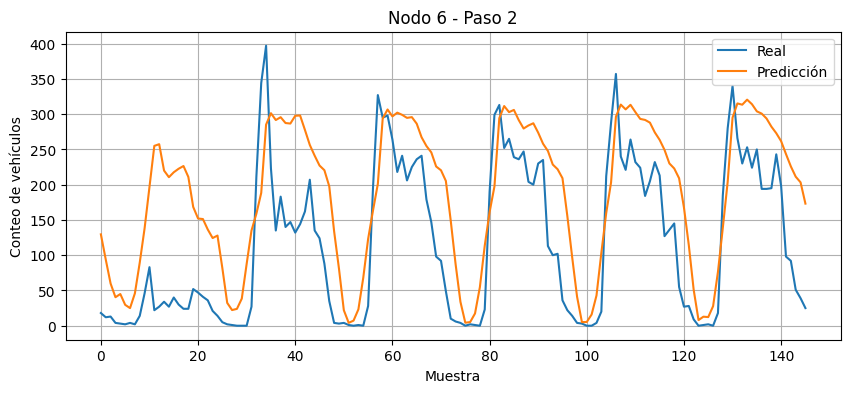

In [ ]:
import matplotlib.pyplot as plt

# Elegir nodo y paso de predicción
node_id =  6 # índice del nodo (0 a 1596)
step = 2       # paso de tiempo (0 = primera hora futura)

plt.figure(figsize=(10, 4))
plt.plot(y_true[:, step, node_id], label="Real")
plt.plot(y_pred[:, step, node_id], label="Predicción")
plt.title(f"Nodo {node_id} - Paso {step}")
plt.xlabel("Muestra")
plt.ylabel("Conteo de vehículos")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import torch.nn.functional as F

# RMSE (Root Mean Squared Error)
rmse = torch.sqrt(F.mse_loss(y_pred, y_true)).item()
print(f"📉 RMSE: {rmse:.4f}")

# MAE ya lo tienes como val_loss


📉 RMSE: 304.3176


In [ ]:
import pandas as pd
import torch

epsilon = 1e-6
mask = y_true > 0

mae_per_node = torch.mean(torch.abs(y_pred - y_true), dim=(0, 1))
rmse_per_node = torch.sqrt(torch.mean((y_pred - y_true)**2, dim=(0, 1)))
mape_per_node = torch.sum(
    torch.abs((y_pred - y_true) / (y_true + epsilon)) * mask,
    dim=(0, 1)
) / torch.sum(mask, dim=(0, 1)) * 100

metrics_df = pd.DataFrame({
    'Nodo': list(range(y_true.shape[2])),
    'MAE': mae_per_node.cpu().numpy(),
    'RMSE': rmse_per_node.cpu().numpy(),
    'MAPE (%)': mape_per_node.cpu().numpy()
})

metrics_df.head()




,Nodo,MAE,RMSE,MAPE (%)
0,0,203.783020,241.338821,3824.578369
1,1,44.349251,55.554665,97.454041
2,2,187.053711,215.262177,NaN
3,3,187.053711,215.262177,NaN
4,4,142.790771,187.347870,6048.764160


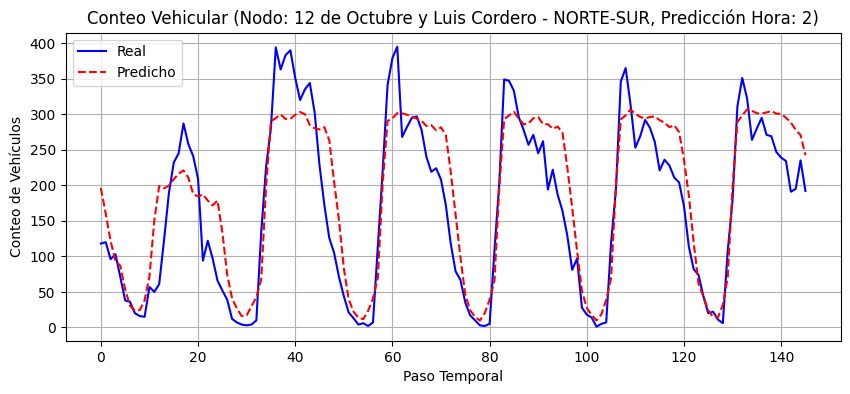

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Elige un NODE_ID de la lista que obtuviste
node_id_to_plot = '12 de Octubre y Luis Cordero - NORTE-SUR'  # <-- Usa un valor de tu lista
step = 1                               # Elige la hora de predicción: 0, 1 o 2

# Encuentra el índice numérico correspondiente al NODE_ID
unique_nodes = np.array(['12 de Octubre y Luis Cordero - NORTE-SUR',
                         '12 de Octubre y Luis Cordero - ORIENTE-OCCIDENTE',
                         '12 de Octubre y Luis Cordero - SUR-NORTE',
                         'Villalengua y Veracruz - NORTE-SUR',
                         'Villalengua y Veracruz - OCCIDENTE-ORIENTE',
                         'Villalengua y Veracruz - SUR-NORTE'])

node_idx = np.where(unique_nodes == node_id_to_plot)[0][0]

# Genera el gráfico
plt.figure(figsize=(10, 4))
plt.plot(y_true[:, node_idx, step], label='Real', color='blue')
plt.plot(y_pred[:, node_idx, step], label='Predicho', color='red', linestyle='--')
plt.title(f'Conteo Vehicular (Nodo: {node_id_to_plot}, Predicción Hora: {step+1})')
plt.xlabel('Paso Temporal')
plt.ylabel('Conteo de Vehículos')
plt.legend()
plt.grid(True)
plt.show()

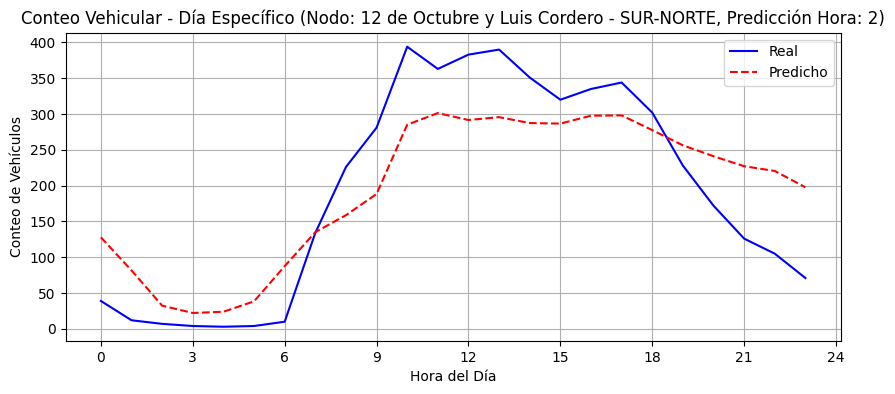

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Parámetros para el gráfico
node_id_to_plot = '12 de Octubre y Luis Cordero - SUR-NORTE' # Reemplaza con un nodo de tu lista
step = 1  # Hora de predicción (0, 1 o 2)

# Determina el rango de tiempo de 24 horas.
# Suponiendo que tus datos tienen 140 horas, puedes elegir un día a partir del inicio.
# Por ejemplo, para ver el segundo día (horas 24 a 48):
start_hour = 24  # Hora de inicio (Ej: 0 para el día 1, 24 para el día 2, etc.)
end_hour = start_hour + 24

# Encuentra el índice numérico correspondiente al NODE_ID
unique_nodes = np.unique(df_long['NODE_ID'])
node_idx = np.where(unique_nodes == node_id_to_plot)[0][0]

# Filtra los datos para el día específico
y_true_day = y_true[start_hour:end_hour, node_idx, step]
y_pred_day = y_pred[start_hour:end_hour, node_idx, step]
horas_del_dia = range(24) # Representa las 24 horas del día

# Genera el gráfico para el día específico
plt.figure(figsize=(10, 4))
plt.plot(horas_del_dia, y_true_day, label='Real', color='blue')
plt.plot(horas_del_dia, y_pred_day, label='Predicho', color='red', linestyle='--')
plt.title(f'Conteo Vehicular - Día Específico (Nodo: {node_id_to_plot}, Predicción Hora: {step+1})')
plt.xlabel('Hora del Día')
plt.ylabel('Conteo de Vehículos')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 25, 3)) # Muestra las horas cada 3 unidades
plt.show()

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Asegúrate de que el modelo esté en modo de evaluación
model.eval()

# Definir la función de evaluación
def evaluate_model(model, val_loader, device):
    y_true_list = []
    y_pred_list = []

    with torch.no_grad():
        for x, y_true_batch in tqdm(val_loader, desc="Evaluando"):
            x = x.to(device)
            y_pred_batch = model(x)

            y_true_list.append(y_true_batch.cpu())
            y_pred_list.append(y_pred_batch.cpu())

    y_true = torch.cat(y_true_list, dim=0)
    y_pred = torch.cat(y_pred_list, dim=0)

    return y_true, y_pred

# Generar las predicciones para todos los nodos en el val_loader
y_true, y_pred = evaluate_model(model, val_loader, device)

print(f'Dimensiones de y_true: {y_true.shape}')
print(f'Dimensiones de y_pred: {y_pred.shape}')

num_samples, T_out, num_nodos = y_true.shape

# --- Crear un DataFrame consolidado con todos los datos ---
# Esto evita errores de indexación posteriores
unique_nodes = np.unique(df_long['NODE_ID'])
assert len(unique_nodes) == num_nodos, "El número de nodos no coincide. Verifica tu `df_long`."

# Reorganizar los tensores para que sean fácilmente convertibles a un DataFrame
# La forma final será (num_samples * T_out * num_nodos)
y_true_flat = y_true.permute(0, 2, 1).reshape(-1).numpy()
y_pred_flat = y_pred.permute(0, 2, 1).reshape(-1).numpy()

# Crear un DataFrame completo
data_df = pd.DataFrame({
    'NODE_ID': np.tile(np.repeat(unique_nodes, T_out), num_samples),
    'Hora_Prediccion': np.tile(np.arange(1, T_out + 1), num_nodos * num_samples),
    'Paso_Temporal_General': np.repeat(np.arange(num_samples), T_out * num_nodos),
    'Valor_Real': y_true_flat,
    'Valor_Predicho': y_pred_flat
})

# --- Análisis y Visualización ---

# Calcular métricas de error
metrics_df = data_df.groupby(['NODE_ID', 'Hora_Prediccion']).agg(
    MAE=('Valor_Real', lambda x: np.mean(np.abs(x - data_df.loc[x.index, 'Valor_Predicho']))),
    RMSE=('Valor_Real', lambda x: np.sqrt(np.mean((x - data_df.loc[x.index, 'Valor_Predicho'])**2)))
).reset_index()

print("\nNodos con el MAE más bajo (mejor rendimiento):")
print(metrics_df.sort_values(by='MAE').head())

print("\nNodos con el MAE más alto (peor rendimiento):")
print(metrics_df.sort_values(by='MAE', ascending=False).head())



Evaluando: 100%|██████████| 5/5 [00:00<00:00,  6.33it/s]


Dimensiones de y_true: torch.Size([146, 3, 1597])
Dimensiones de y_pred: torch.Size([146, 3, 1597])

Nodos con el MAE más bajo (mejor rendimiento):
                                                NODE_ID  Hora_Prediccion  \
2745                 Av. La Prensa y Zamora - SUR-NORTE                1   
3198  Av. Mariscal Sucre y Bernardo de Legarda - ORI...                1   
3120  Av. Manuel Serrano y La Florida - OCCIDENTE-OR...                1   
102     Antonio Rodríguez y Quevedo - OCCIDENTE-ORIENTE                1   
3121  Av. Manuel Serrano y La Florida - OCCIDENTE-OR...                2   

           MAE      RMSE  
2745  0.073661  0.127649  
3198  0.075204  0.106957  
3120  0.076374  0.091654  
102   0.079280  0.117839  
3121  0.091193  0.117541  

Nodos con el MAE más alto (peor rendimiento):
                                                NODE_ID  Hora_Prediccion  \
4280               NNUU y Japón Sur - OCCIDENTE-ORIENTE                3   
4279               NNUU y Japón Su

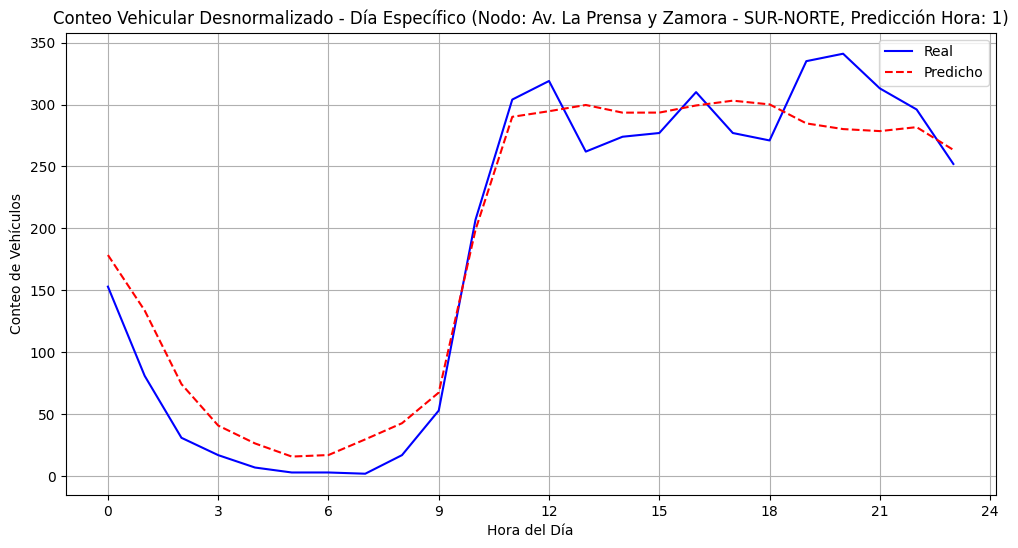

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que 'stats' contiene la media y la desviación estándar
# Por ejemplo, stats = {'mean': torch.tensor(100), 'std': torch.tensor(50)}

# --- Visualización para un Día Específico ---

# Parámetros para el gráfico
node_id_to_plot = metrics_df.sort_values(by='MAE').iloc[0]['NODE_ID']
step_to_plot = 1  # Hora de predicción (1, 2 o 3)

# Rango de 24 horas para el gráfico
start_hour = 24
end_hour = start_hour + 24

# Filtra los datos directamente del DataFrame consolidado
day_data = data_df[(data_df['NODE_ID'] == node_id_to_plot) &
                   (data_df['Hora_Prediccion'] == step_to_plot) &
                   (data_df['Paso_Temporal_General'] >= start_hour) &
                   (data_df['Paso_Temporal_General'] < end_hour)].copy()

# Desnormalizar ambos valores (y_real y y_pred)
# Se convierten los tensores de PyTorch a arrays de NumPy antes de la operación
mean = stats['mean'].numpy()
std = stats['std'].numpy()

day_data['Valor_Real_Original'] = (day_data['Valor_Real'] * std) + mean
day_data['Valor_Predicho_Original'] = (day_data['Valor_Predicho'] * std) + mean

# Genera el gráfico con los valores desnormalizados
plt.figure(figsize=(12, 6))
plt.plot(day_data['Paso_Temporal_General'] - start_hour, day_data['Valor_Real_Original'], label='Real', color='blue')
plt.plot(day_data['Paso_Temporal_General'] - start_hour, day_data['Valor_Predicho_Original'], label='Predicho', color='red', linestyle='--')
plt.title(f'Conteo Vehicular Desnormalizado - Día Específico (Nodo: {node_id_to_plot}, Predicción Hora: {step_to_plot})')
plt.xlabel('Hora del Día')
plt.ylabel('Conteo de Vehículos')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 25, 3))
plt.show()

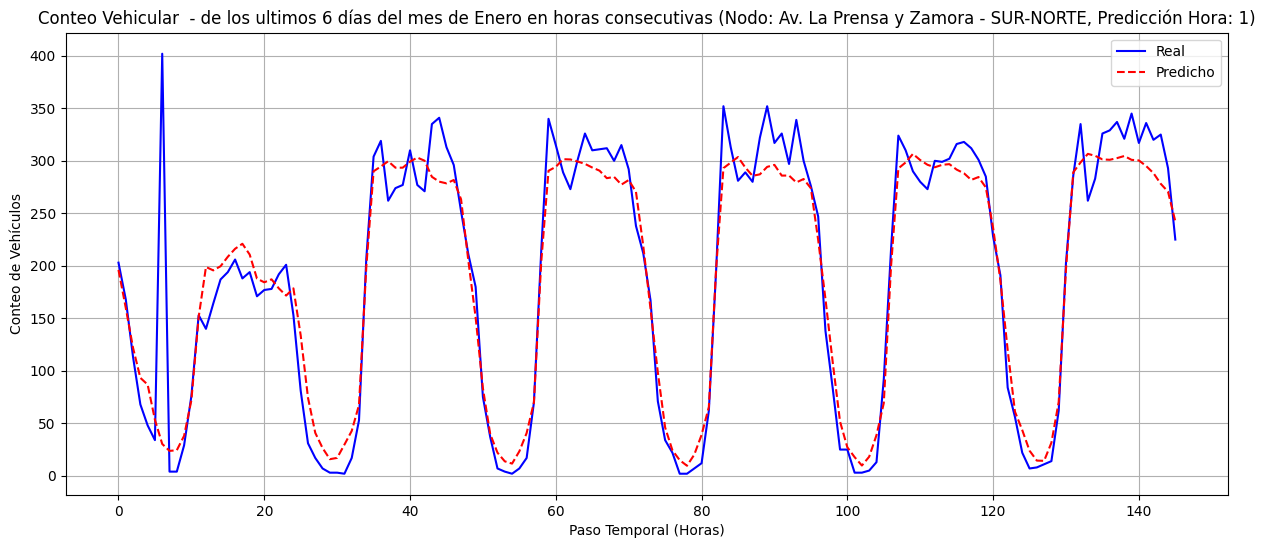

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que 'stats' contiene la media y la desviación estándar
# Por ejemplo, stats = {'mean': torch.tensor(100), 'std': torch.tensor(50)}

# --- Visualización para el Mes Completo ---

# Parámetros para el gráfico
# Elige el mejor nodo según tu análisis
node_id_to_plot = metrics_df.sort_values(by='MAE').iloc[0]['NODE_ID']
step_to_plot = 1  # Hora de predicción (1, 2 o 3)

# Filtra los datos directamente del DataFrame consolidado
# No hay restricción de rango de tiempo para ver todo el período
full_data = data_df[(data_df['NODE_ID'] == node_id_to_plot) &
                    (data_df['Hora_Prediccion'] == step_to_plot)].copy()

# Desnormalizar ambos valores (y_real y y_pred)
# Se convierten los tensores de PyTorch a arrays de NumPy antes de la operación
mean = stats['mean'].numpy()
std = stats['std'].numpy()

full_data['Valor_Real_Original'] = (full_data['Valor_Real'] * std) + mean
full_data['Valor_Predicho_Original'] = (full_data['Valor_Predicho'] * std) + mean

# Genera el gráfico con los valores desnormalizados
plt.figure(figsize=(15, 6))
plt.plot(full_data['Paso_Temporal_General'], full_data['Valor_Real_Original'], label='Real', color='blue')
plt.plot(full_data['Paso_Temporal_General'], full_data['Valor_Predicho_Original'], label='Predicho', color='red', linestyle='--')
plt.title(f'Conteo Vehicular  - de los ultimos 6 días del mes de Enero en horas consecutivas (Nodo: {node_id_to_plot}, Predicción Hora: {step_to_plot})')
plt.xlabel('Paso Temporal (Horas)')
plt.ylabel('Conteo de Vehículos')
plt.legend()
plt.grid(True)
plt.show()

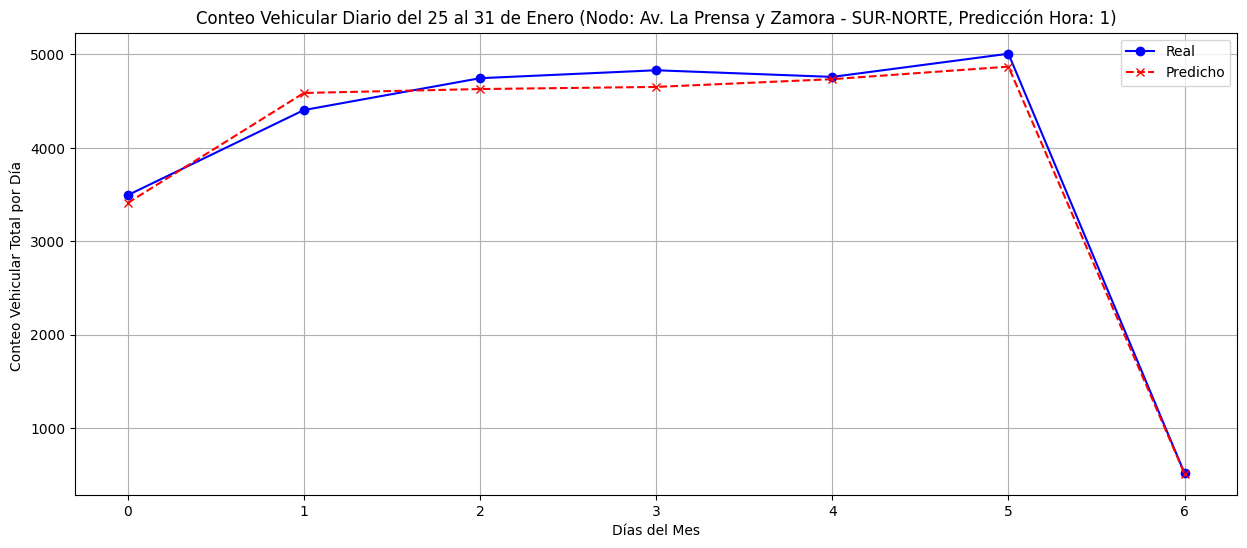

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que 'stats' contiene la media y la desviación estándar
# Por ejemplo, stats = {'mean': torch.tensor(100), 'std': torch.tensor(50)}

# --- Visualización del Conteo Diario Total ---

# Parámetros para el gráfico
# Elige el mejor nodo según tu análisis
node_id_to_plot = metrics_df.sort_values(by='MAE').iloc[0]['NODE_ID']
step_to_plot = 1  # Hora de predicción (1, 2 o 3)

# Filtra los datos del DataFrame consolidado para todo el período
full_data = data_df[(data_df['NODE_ID'] == node_id_to_plot) &
                    (data_df['Hora_Prediccion'] == step_to_plot)].copy()

# Desnormalizar ambos valores (y_real y y_pred)
# Se convierten los tensores de PyTorch a arrays de NumPy antes de la operación
mean = stats['mean'].numpy()
std = stats['std'].numpy()

full_data['Valor_Real_Original'] = (full_data['Valor_Real'] * std) + mean
full_data['Valor_Predicho_Original'] = (full_data['Valor_Predicho'] * std) + mean

# Agrupar los datos por día y sumar los conteos vehiculares
# Los 'Pasos Temporales' (horas) se convierten en días dividiendo por 24
full_data['Dia_del_Mes'] = full_data['Paso_Temporal_General'] // 24
daily_data = full_data.groupby('Dia_del_Mes').agg({
    'Valor_Real_Original': 'sum',
    'Valor_Predicho_Original': 'sum'
}).reset_index()

# Genera el gráfico del conteo diario
plt.figure(figsize=(15, 6))
plt.plot(daily_data['Dia_del_Mes'], daily_data['Valor_Real_Original'], label='Real', color='blue', marker='o')
plt.plot(daily_data['Dia_del_Mes'], daily_data['Valor_Predicho_Original'], label='Predicho', color='red', linestyle='--', marker='x')
plt.title(f'Conteo Vehicular Diario del 25 al 31 de Enero (Nodo: {node_id_to_plot}, Predicción Hora: {step_to_plot})')
plt.xlabel('Días del Mes')
plt.ylabel('Conteo Vehicular Total por Día ')
plt.legend()
plt.grid(True)
plt.xticks(daily_data['Dia_del_Mes'])
plt.show()

In [ ]:
import pandas as pd

# Suponiendo que metrics_df ya está definido
promedios_por_hora = (
    metrics_df
    .groupby("Hora_Prediccion")[["MAE", "RMSE"]]
    .mean()
    .reset_index()
)

print(promedios_por_hora)


   Hora_Prediccion       MAE      RMSE
0                1  0.717792  0.855508
1                2  0.720144  0.856602
2                3  0.720301  0.856146
